# The Physics of Ballet 
#### By Aubrey Parks 

<img src="Pirouette.png">

Ballet technique focuses on two key functions of movement: precision and control. However, every dancer has a different way of performing even the simplest of movements due to variations in training. With so many variations in technique, how does a dancer determine the best way of executing a step? Through my project, I aim to understand what effect physics has on a dancer’s pirouette, specifically on how variations in the placement of feet preparations affects the turn in its entirety.

## The Physics 

A pirouette is one of the most basic ballet turns, in which the dancer simply “pushes off” the ground and begins to spin. Ignoring the upper body's movements, a dancer's preparation for a pirouette is simple: their feet are "turned-out" and placed directly in line with each other with some distance between them. They then plié and "push off" the ground in order to rise en pointe on one foot and begin to turn. Their turning position is called retiré, which can be seen in the picture at the top of the page. However, the dancer does not just magically begin turning. Because their feet are separated by some distance, when they "push off" the ground, they are creating a torque force that allows for and causes the turn. Since the torque is the only force that causes them to spin, we then know:

$$\tau = rF = I\alpha$$
(Equation 1)

Where τ is the torque, r is the distance between the feet in the preparing stance, F is the initial force of the turn, I is the moment of inertia, and α is the angular acceleration. Additionally, if we model the dancer as a thin rod, we know both: 

$$ I = \frac{1}{12}mL^2$$ (Equation 2)

$$ \alpha=\frac{2\theta}{t^2}$$ (Equation 3)

Where m is the mass of the dancer, L is the height of the dancer divided by two, a is the linear acceleration, 
theta is the angle of the turn in radians, and t is the time of the turn. Finally, we can combine all these equations together in order to obtain the total time of the turn in Equation 4. 

$$ t=\sqrt{\frac{mL^2\theta}{6rF}}$$
(Equation 4)

Equation 4 gives an expression for how the mass, height, angle, distance between initial foot placement, and initial force of the turn affects the time of the turn. However, while this will give an overall time for the turn, it does not provide more detail about how the motion of the pirouette acts during the turn. 

During the turn, the primary force that acts upon the dancer is the frictional force between the pointe shoe and the floor. There are other forces that act on the pirouette, such as air resistance, but they are negligible in comparison to the frictional force. This frictional force will cause the dancer to slow down. In order to represent this in equations, we can model the moment of inertia as a solid cylinder (Equation 5). Additionally, we need the angular acceleration for when the initial velocity is not zero (Equation 6), and the equation for the force of friction (Equation 7). 

$$ I = mr_2^2 $$
(Equation 5)

$$ \alpha = \frac{2(\theta - t\omega)}{t^2} $$
(Equation 6)

$$ F_f = F_n\mu = mg\mu $$
(Equation 7)

Where $r_2$ represents the radius of the cylinder, $\omega$ represents the angular velocity, $F_n$ represents the normal force, $\mu$ represents the coefficient of kinetic friction, and g represents the acceleration due to gravity. After combining these equations, we can gain Equation 8, which forms an equation that relates the angle of the turn to time. 

$$ gt^2\mu + r_2t\omega - r_2^2\theta = 0 $$
(Equation 8)



Finally, the final equations I will be using are simply rearrangements of the above equations that solve directly for the angular velocity and the angle. These are equations 9 and 10: 

$$ \omega = \frac{r_2gt\mu}{L^2} + \frac{\theta}{t} $$
(Equation 9)

$$ \theta = t\omega - \frac{r_2gt^2\mu}{L^2}$$
(Equation 10)

## The Code

My code is structured into 8 different functions that calculate different elements, depending on what the user desires to calculate. Initially, the user must input values for the mass, height, initial force, initial distance between feet, and the fraction of the turns that the dancer is doing. However, for simplicity, I will define these values below. The reader may change any of these values to see the effects of different initial conditions. 

In [1]:
import pylab as py
import math 
import numpy as np 
import vpython as vp 

m = 100 #kg - mass 
L = 0.6 #a height of 1.2m divided by 2 - height
theta = 2*math.pi #rad - angle
r = 1 #m - initial foot placement 
F = 2 #N - initial force
mu, g, r2 = 0.3, 9.8, 0.0254

<IPython.core.display.Javascript object>

After these calculations, the first option the user has is to calculate the time it takes for the dancer's turn based on the initial specifications in the time() function: 

In [2]:
def time(r, F, theta, m, L): 
    
    return math.sqrt((m*(L**2)*theta)/(6*r*F))

print("The time of the turn is", time(r, F, theta, m, L), "seconds.")

The time of the turn is 4.3416075273496055 seconds.


The result of the time equation is interesting to see but becomes a much more useful function when we calculate more complex values. 

The second option the user has is to plot is the affect the initial foot placement of the turn has on the time in the plot_r() function: 

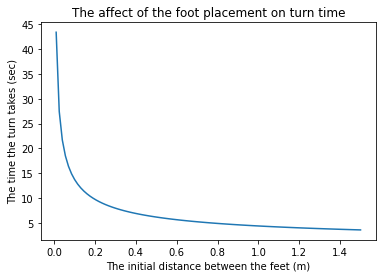

In [3]:
def plot_r(m, L, F, theta): 
    
    r_list = []
    t_list = []
    
    for r in np.linspace(0.01, 1.5, 100): 
        r_list.append(r)
        t_list.append(time(r, F, theta, m, L))
        
    py.plot(r_list, t_list)
    py.xlabel("The initial distance between the feet (m)")
    py.ylabel("The time the turn takes (sec)")
    py.title("The affect of the foot placement on turn time")
    
plot_r(m, L, F, theta)

As one can see, the distance the foot placement has on the time of the turn is very important at small distances, however, it is less important at larger distances. This means that if a dancer normally prepares their pirouette with their feet very close together, they will have much more variation in the time of their turns than a dancer that normally prepares their pirouette with a larger distance between their feet. However, there is the limit of how long the dancer's leg is. It is not practical to make the initial foot placement be the same length of the dancer's leg, because it would take a large amount of energy to stand up from that position. For this reason, I stopped the r value at 1.4m. 

Next, we can calculate the effect of the initial force on the time of the turn in the plot_F() function: 

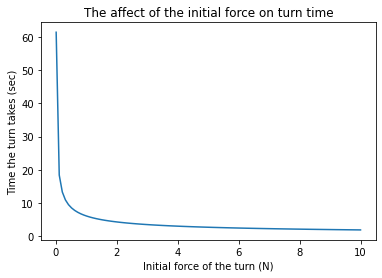

In [4]:
def plot_F(r, L, theta, m):
    
    F_list = []
    t_list = []
    
    for F in np.linspace(0.01, 10, 100): 
        F_list.append(F)
        t_list.append(time(r, F, theta, m, L))
        
    py.plot(F_list, t_list)
    py.xlabel("Initial force of the turn (N)")
    py.ylabel("Time the turn takes (sec)")
    py.title("The affect of the initial force on turn time")
    
plot_F(r, L, theta, m)

The effect of the initial force on the time of the turn is very similar to the effect of the foot placement; however, it appears as if there is a steeper increase for the time the turn takes at lower forces and a shallower decrease in the larger forces. This indicates to a dancer that the initial force of the turn will make a larger impact on the speed of the turn, because people who use very little force will have a difficult time completing their turn in a reasonable amount of time. 

Next, the user can choose to calculate the angular velocity for the turn using the omega() function: 

In [5]:
def omega(r, F, theta, m, L, mu, g, r2): 
    
    t = time(r, F, theta, m, L)
    
    return (((r2*mu*g*t)/(L**2))+ (theta/t))

print("The angular velocity for the turn is", omega(r, F, theta, m, L, mu, g, r2), "s^-1")

The angular velocity for the turn is 2.3477966305397553 s^-1


Similarly to the time calculation, while it is interesting to see what the angular velocity is, it is not very important unless used in other calculations. 

Next, the user can plot angle of the turn according to the time in the finding_theta() function, which uses the finding_theta() function to calculate theta: 

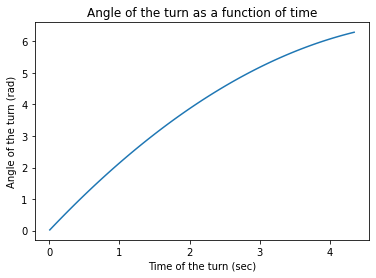

In [6]:
def finding_theta(t, w, L, mu, g, r2): 
    
    return ((w*t) - ((r2*mu*g*(t**2))/(L**2)))

def plot_theta(r, F, theta, m, L, mu, g, r2): 

    theta_list = []
    t_list = []
    
    final_t = time(r, F, theta, m, L)
    w = omega(r, F, theta, m, L, mu, g, r2)
    
    
    for t in np.linspace(0.01, final_t, 100): 
        t_list.append(t)
        theta_list.append(finding_theta(t, w, L, mu, g, r2))
        
    py.plot(t_list, theta_list)
    py.xlabel("Time of the turn (sec)")
    py.ylabel("Angle of the turn (rad)")
    py.title("Angle of the turn as a function of time")
    

plot_theta(r, F, theta, m, L, mu, g, r2)

In the plot, one can see that because the time of the turn is short and the force of friction is not very high, the plot is relatively linear - especially at the beginning of the turn. However, as the turn continues, it begins to curve, representing the dancer beginning to slow down. If the dancer were to continue turning, eventually the force of the friction would cause the dancer to stop, which is represented by a horizontal asymptote. 

Finally, the last element that the user can calculate is an animation of the turn, which represents where the dancer is looking throughout the turn in the animate() function: 

In [7]:
def animate(r, F, theta, m, L): 
    
    scene1 = vp.canvas(title = "Where the dancer is facing")
    model = vp.sphere(canvas = scene1, pos = vp.vector(0, 0, 0), radius = 0.3, color = vp.color.white)
    
    final_t = time(r, F, theta, m, L)
    T = np.linspace(0.00, final_t, 100) 
    
    for t in T: 
        angle = (4*math.pi)/final_t
        x = r*math.cos(t*angle)
        y = r*math.sin(t*angle)
        
        vp.rate(10)
        model.pos = vp.vector(x, y, 0)
        
animate(r, F, theta, m, L)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

If one watches the animation, one can see that the dancer starts out at one speed that slowly decreases. This change is slight, but for an actual dancer, the change in the speed is very important for the dancer to understand so that they can maximize the number of turns they perform. If the animation were to continue through many more turns, the sphere would eventually come to a stop, which would be due to the frictional force stopping the turn. However, this is not reasonable for a dancer. 

## Conclusion 

While every dancer has their own way of preparing their pirouettes, they rarely think about how their preparation affects their turns in the physical sense. Without thinking about the physics behind their movements, dancers often end up working against it, making it significantly more difficult to dance. While, in general, these results do not completely solve the answers of how to perform a perfect pirouette, they can help dancers understand the mechanics of their turns and what is needed to improve their turns. My goal is that this project inspires dancers to think about the physics behind their movements, and how they can use physics to their advantage to perfect their technique. 

## References

Laws, Kenneth, et al. Physics and the Art of Dance: Understanding Movement. Oxford University Press, 2008.